# Feature wise effect on prediction of diabetes

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

df = pd.read_csv("../data/diabetes.csv")
features = df.columns.drop("Outcome")

## Glucose

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


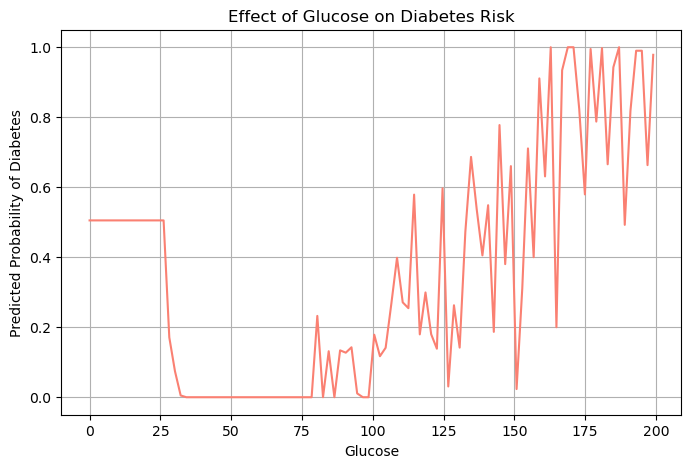

In [21]:
X = df[["Glucose"]]
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

glucose_range = np.linspace(
    df["Glucose"].min(), df["Glucose"].max(), 100).reshape(-1, 1)
probabilities = model.predict_proba(glucose_range)[:, 1]

plt.figure(figsize=(8, 5))
plt.plot(glucose_range, probabilities, color="salmon")
plt.title("Effect of Glucose on Diabetes Risk")
plt.xlabel("Glucose")
plt.ylabel("Predicted Probability of Diabetes")
plt.grid(True)
plt.savefig("../output/glucose.png")
plt.show()

## Insulin

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


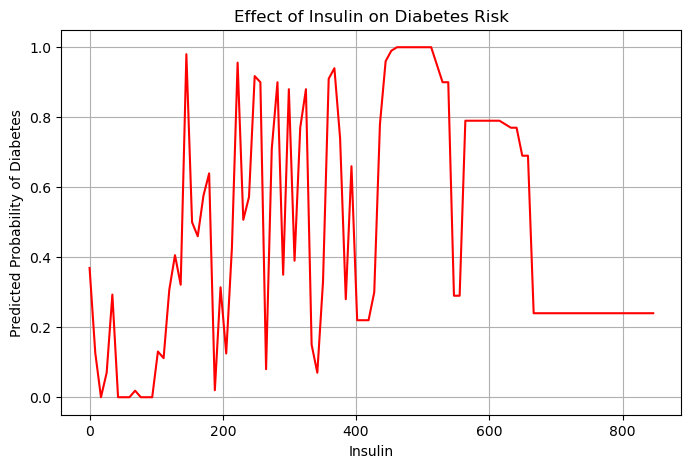

In [22]:
X = df[["Insulin"]]
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

glucose_range = np.linspace(
    df["Insulin"].min(), df["Insulin"].max(), 100).reshape(-1, 1)
probabilities = model.predict_proba(glucose_range)[:, 1]

plt.figure(figsize=(8, 5))
plt.plot(glucose_range, probabilities, color="red")
plt.title("Effect of Insulin on Diabetes Risk")
plt.xlabel("Insulin")
plt.ylabel("Predicted Probability of Diabetes")
plt.grid(True)
plt.savefig("../output/insulin.png")
plt.show()

## Overall Predictions

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)

final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)
y_prob = final_model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       125
           1       0.67      0.55      0.61        67

    accuracy                           0.75       192
   macro avg       0.73      0.70      0.71       192
weighted avg       0.74      0.75      0.74       192



/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/bas

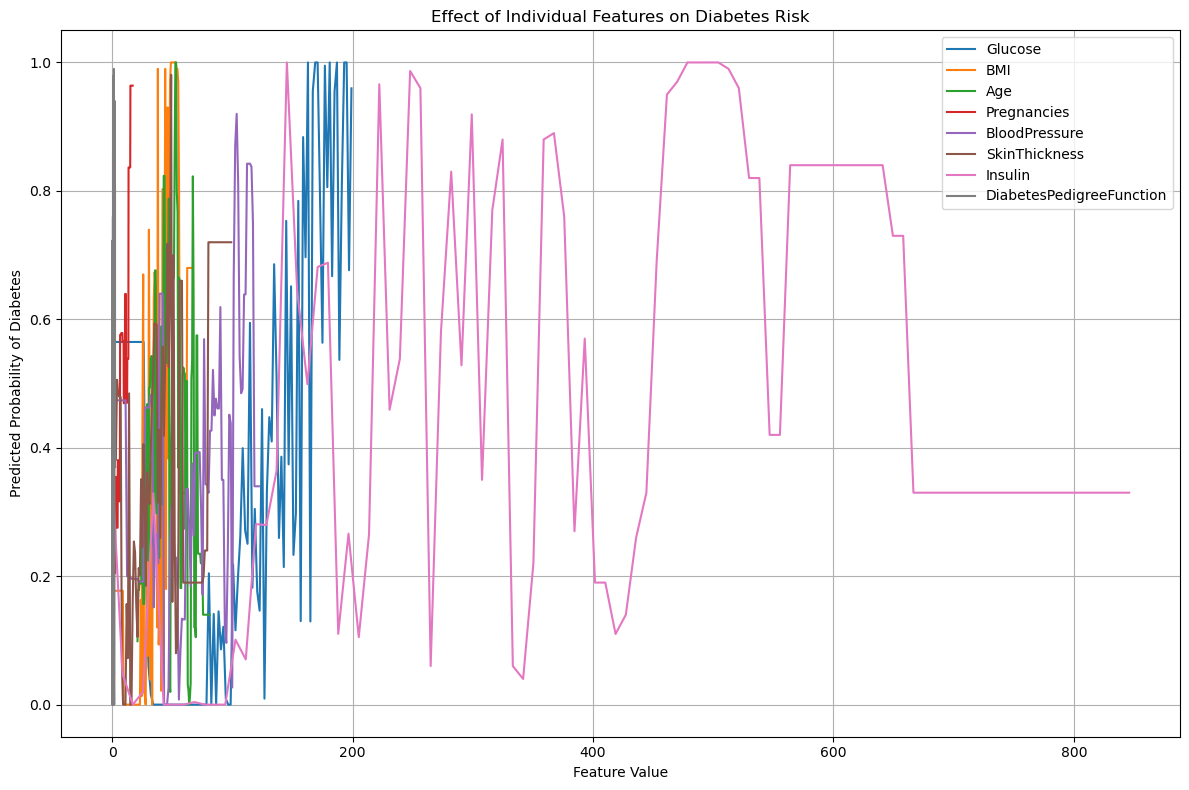

In [19]:
target = "Outcome"

features = [
    "Glucose", "BMI", "Age", "Pregnancies", "BloodPressure",
    "SkinThickness", "Insulin", "DiabetesPedigreeFunction"
]

plt.figure(figsize=(12, 8))

# Loop through features
for feature in features:
    X = df[[feature]]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Generate values in range of current feature
    x_range = np.linspace(
        df[feature].min(), df[feature].max(), 100).reshape(-1, 1)
    y_proba = model.predict_proba(x_range)[:, 1]

    plt.plot(x_range, y_proba, label=feature)

# Final plot settings
plt.title("Effect of Individual Features on Diabetes Risk")
plt.xlabel("Feature Value")
plt.ylabel("Predicted Probability of Diabetes")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../output/individual_feature_influence.png")
plt.show()